In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("../data/raw/historical_energy.csv", parse_dates=["date"])

df.head(), df.info()

Matplotlib is building the font cache; this may take a moment.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           36 non-null     datetime64[ns]
 1   energy_kwh     36 non-null     float64       
 2   price_per_kwh  36 non-null     float64       
 3   co2_factor     36 non-null     float64       
dtypes: datetime64[ns](1), float64(3)
memory usage: 1.3 KB


(        date  energy_kwh  price_per_kwh  co2_factor
 0 2021-01-31     10998.0          0.211       0.383
 1 2021-02-28     11230.0          0.232       0.356
 2 2021-03-31     11824.0          0.235       0.381
 3 2021-04-30     12061.0          0.198       0.383
 4 2021-05-31     10633.0          0.277       0.423,
 None)

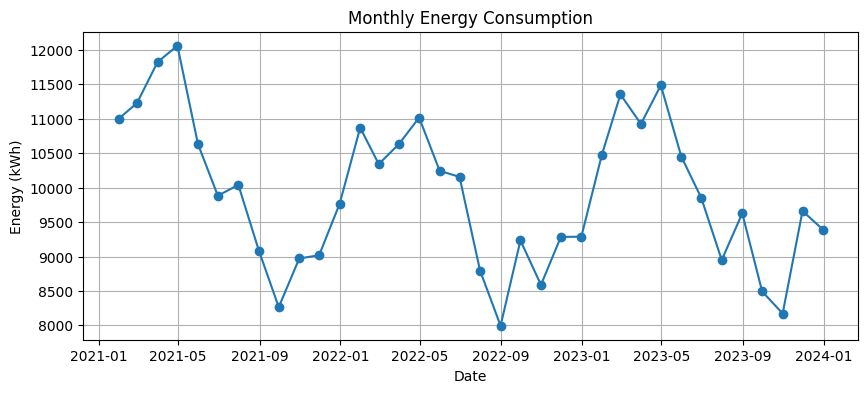

In [2]:
plt.figure(figsize=(10,4))
plt.plot(df["date"], df["energy_kwh"], marker="o")
plt.title("Monthly Energy Consumption")
plt.xlabel("Date")
plt.ylabel("Energy (kWh)")
plt.grid(True)
plt.show()


In [3]:
df["monthly_cost"] = df["energy_kwh"] * df["price_per_kwh"]
df["monthly_co2"] = df["energy_kwh"] * df["co2_factor"]

df[["monthly_cost", "monthly_co2"]].describe()


,monthly_cost,monthly_co2
count,36.000000,36.000000
mean,2278.928111,3934.040556
std,375.055396,441.020260
min,1569.024000,2991.930000
25%,1971.418750,3597.714000
50%,2290.309500,3981.641000
75%,2575.207500,4168.731000
max,3009.594000,4836.804000


Initial observations:

Energy demand shows clear seasonal patterns

Cost and CO₂ scale linearly with consumption

Forecasting energy demand is sufficient to estimate future cost and emissions

In [ ]:
# Create a comprehensive analysis dashboard
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# 1. Energy consumption trend with cost overlay
ax1 = axes[0, 0]
ax1.plot(df["date"], df["energy_kwh"], marker="o", color="blue", linewidth=2, label="Energy (kWh)")
ax1.set_xlabel("Date")
ax1.set_ylabel("Energy (kWh)", color="blue")
ax1.tick_params(axis="y", labelcolor="blue")
ax1.grid(True, alpha=0.3)
ax1.set_title("Energy Consumption & Cost Trend")

ax1_twin = ax1.twinx()
ax1_twin.plot(df["date"], df["monthly_cost"], marker="s", color="green", linewidth=2, label="Cost ($)")
ax1_twin.set_ylabel("Monthly Cost ($)", color="green")
ax1_twin.tick_params(axis="y", labelcolor="green")

# 2. CO2 emissions trend
ax2 = axes[0, 1]
ax2.bar(df["date"], df["monthly_co2"], color="red", alpha=0.7)
ax2.set_xlabel("Date")
ax2.set_ylabel("CO2 Emissions (kg)")
ax2.set_title("Monthly CO2 Emissions")
ax2.grid(True, alpha=0.3, axis="y")

# 3. Cost vs Energy correlation
ax3 = axes[1, 0]
ax3.scatter(df["energy_kwh"], df["monthly_cost"], s=100, alpha=0.6, color="purple")
ax3.set_xlabel("Energy (kWh)")
ax3.set_ylabel("Monthly Cost ($)")
ax3.set_title(f"Cost-Energy Correlation (R²={df['energy_kwh'].corr(df['monthly_cost'])**2:.3f})")
ax3.grid(True, alpha=0.3)

# 4. Price per kWh variation
ax4 = axes[1, 1]
ax4.plot(df["date"], df["price_per_kwh"], marker="D", color="orange", linewidth=2)
ax4.set_xlabel("Date")
ax4.set_ylabel("Price per kWh ($)")
ax4.set_title("Electricity Price Fluctuations")
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Summary statistics
print("=" * 60)
print("ENERGY DATA ANALYSIS SUMMARY")
print("=" * 60)
print(f"\nTotal Energy Consumed: {df['energy_kwh'].sum():,.0f} kWh")
print(f"Total Cost: ${df['monthly_cost'].sum():,.2f}")
print(f"Total CO2 Emissions: {df['monthly_co2'].sum():,.2f} kg")
print(f"\nAverage Monthly Energy: {df['energy_kwh'].mean():,.0f} kWh")
print(f"Average Monthly Cost: ${df['monthly_cost'].mean():,.2f}")
print(f"Price Range: ${df['price_per_kwh'].min():.3f} - ${df['price_per_kwh'].max():.3f}/kWh")
print(f"Cost per kWh (Avg): ${(df['monthly_cost'].sum() / df['energy_kwh'].sum()):.3f}")